# PHYS 325 Scientific Computing -- Fall 2018

## Exam statistics

- Average: 49.7 points (83%)
- Median: 49.0 points
- Standard deviation: 9.3 points (15%)

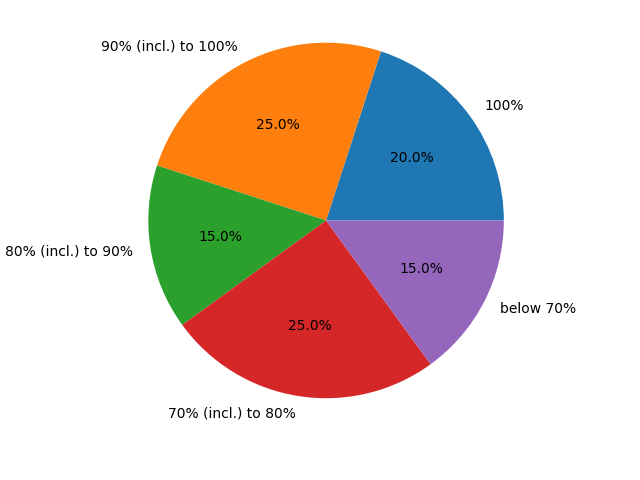

Compare with homework:

- Average: 85%
- Median: 88%
- Standard deviation: 15%

## 2.3 Data analysis

According to Wikipedia: Activity for getting *insight* from *data*

- collecting data (simulation, experiment)
- organizing data
- data cleaning (errors, correlations)
- exploratory analysis (forming hypotheses; do I need more data?)
- modeling, fitting, statistical analysis
- data visualization
- drawing conclusions

=> scientific method!

<img src="https://imgs.xkcd.com/comics/the_difference.png " alt="Scientific Approach" style="width: 400px;"/>

<div style="text-align: right">Source: <a href="https://xkcd.com/242/">xkcd</a></div>

References for this chapter:

*[Everything you wanted to know about Data Analysis and Fitting but were afraid to ask](https://arxiv.org/pdf/1210.3781.pdf)* by Peter Young

*"Numerical Recipes"*, chapters 3, 14 and 15

### 2.3.1 Interpolation

discrete data $\longrightarrow$ continuous function

Needed for:

- (multi-dimensional) plotting
- numerical differentiation and integration
- solving differential equations
- interpolation of numerically difficult functions
     - evaluate function on a fine grid before simulation start
     - when function is needed, use interpolation instead of expensive numerical function evaluation
     - very important for Monte Carlo simulations!

Interpolation **goes through all data points** and provides values inbetween

=> this is different from fitting!

**Kinds of interpolation**:

- polynomial

  $$f(x) = a_0 +a_1x +a_2x^2 +\ldots+a_nx^n$$

  always possible with arbitrary accuracy for continuous functions defined on a finite interval

- spline (piecewise polynomial)
- rational functions (Pade)

  $$f(x)=\frac{b_0 +b_1x +b_2x^2 +\ldots+b_mx^m}{a_0 +a_1x +a_2x^2 +\ldots+a_nx^n}$$
  
- can also use trigonometric functions (Fourier methods)

**Polynomial interpolation**

- For $n+1$ different points there exists **only one** interpolating polynomial of degree $n$
- Note that higher order polynomials are highly oscillating

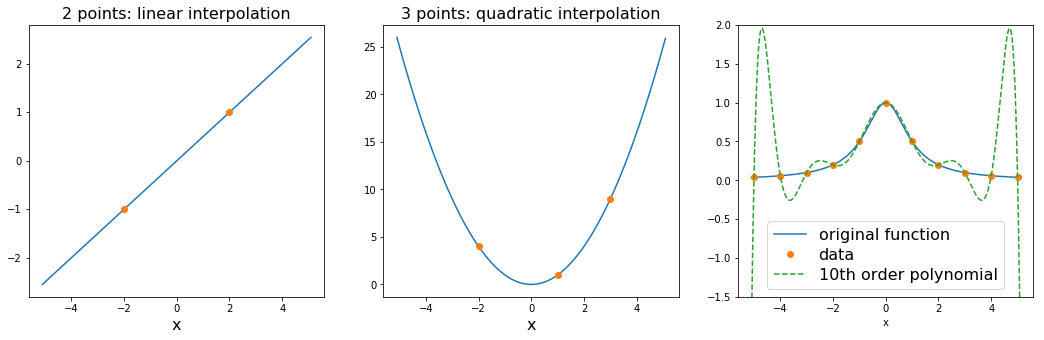

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1/(1+x*x)

x = np.arange(-5.1, 5.1, 0.01)

fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(x, x/2)
ax1.plot([-2,2], [-1,1], 'o')
ax1.set_xlabel("x", fontsize=16)
ax1.set_title("2 points: linear interpolation", fontsize=16)

ax2.plot(x, x**2)
ax2.plot([-2,1,3], [4,1,9], 'o')
ax2.set_xlabel("x", fontsize=16)
ax2.set_title("3 points: quadratic interpolation", fontsize=16)

dataX = np.arange(-5.0, 6.0, 1)
dataY = f(dataX)
interpol = np.poly1d(np.polyfit(dataX, dataY, 10))

ax3.set_ylim(-1.5,2)
ax3.plot(x, f(x), label='original function')
ax3.plot(dataX, dataY, 'o', label='data')
ax3.plot(x, interpol(x), '--', label='10th order polynomial')
ax3.set_xlabel("x")
ax3.legend(loc='lower center', fontsize=16, labelspacing=0.3)

plt.show()

**Spline interpolation**

- splines are piecewise polynomial functions
- the pieces are "glued together" at the data points
- order $n$ spline: match function and derivatives up to incl. order $n-1$
- globally smooth up to $(n-1)$st derivative

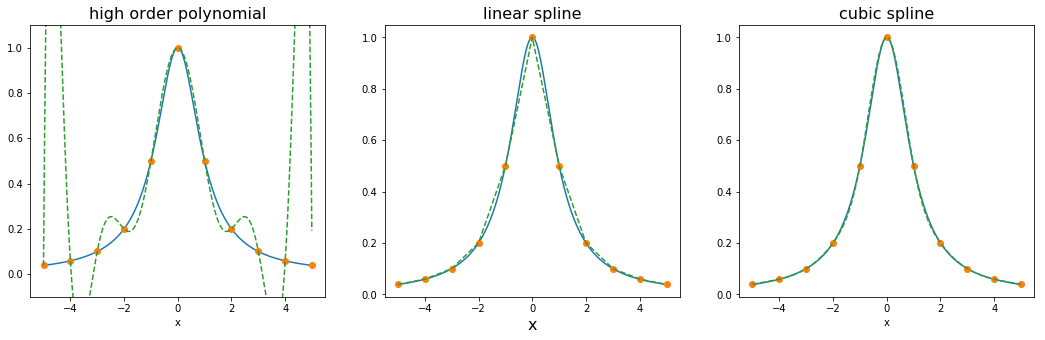

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def f(x):
    return 1/(1+x*x)

x = np.arange(-5.0, 5.0, 0.01)
dataX = np.arange(-5.0, 6.0, 1)
dataY = f(dataX)

fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

spline_linear = interp1d(dataX, dataY, kind='linear')
spline_cubic = interp1d(dataX, dataY, kind='cubic')

ax1.set_ylim(-0.1,1.1)
ax1.plot(x, f(x))
ax1.plot(dataX, dataY, 'o')
ax1.plot(x, interpol(x), '--')
ax1.set_xlabel("x")
ax1.set_title("high order polynomial", fontsize=16)

ax2.plot(x, f(x))
ax2.plot(dataX, dataY, 'o')
ax2.plot(x, spline_linear(x), '--')
ax2.set_xlabel("x", fontsize=16)
ax2.set_title("linear spline", fontsize=16)

ax3.plot(x, f(x))
ax3.plot(dataX, dataY, 'o')
ax3.plot(x, spline_cubic(x), '--')
ax3.set_xlabel("x")
ax3.set_title("cubic spline", fontsize=16)

plt.show()

- better suited to interpolate over a large range
- often used in plotting programs
- most important case is the cubic spline (matching of function value, slope, curvature)

<br><br>

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/Spline_%28PSF%29.png" alt="Wooden Spline" style="width: 300px;"/>

The "original" wooden spline used in the aircraft and shipbuilding industries. Image: [Wikipedia](https://en.wikipedia.org/wiki/Spline_(mathematics)#History)

<br>

Construction of a cubic spline $S(x)$ on the interval $[a,b]$:

- original $n+1$ data points $(x_i,y_i)$ with $a=x_0<x_1<\ldots<x_n=b$
- on each subinterval $[x_{i-1}, x_i]$, the spline is a polynomial of degree 3
- $S(x_i)=y_i$

$$ S(x)=\left\{{\begin{array}{rl}C_{1}(x),&x_{0}\leq x\leq x_{1}\\\cdots &\\C_{i}(x),&x_{i-1}<x\leq x_{i}\\\cdots &\\C_{n}(x),&x_{n-1}<x\leq x_{n}\end{array}}\right.$$

where each $C_{i}=a_{i}+b_{i}x+c_{i}x^{2}+d_{i}x^{3}(d_{i}\neq 0)$

Boundary conditions to determine the spline coefficients $a_i$, $b_i$, $c_i$, $d_i$ for all $i$:

- function values match: $C_i(x_{i-1})=y_{i-1}$ and $C_i(x_i)=y_i$ for $i=1,\ldots,n\ \ \ \; \Rightarrow 2n$ equations
- first derivatives match: $C'_i(x_i)=C'_{i+1}(x_i)$ for $i=1,\ldots,n-1\ \ \ \ \ \; \ \ \ \ \ \ \ \ \ \ \ \ \ \Rightarrow n-1$ equations
- second derivatives match: $C''_i(x_i)=C''_{i+1}(x_i)$ for $i=1,\ldots,n-1\ \ \; \ \ \ \ \ \ \ \ \ \ \Rightarrow n-1$ equations

In total: $4n-2$ equations for $4n$ spline coefficients

Add two additional conditions, for example:

- $C''_1(x_0)=C''_n(x_n)=0$: natural boundary conditions
- $C_1(x_0)=C_n(x_n)$ and $C'_1(x_0)=C'_n(x_n)$ and $C''_1(x_0)=C''_n(x_n)$: periodic boundary conditions

The resulting linear equations can be written in *matrix form* and solved with linear algebra routines

**Rational functions:**

- useful for functions with poles, where polynomial interpolation can give poor results
- often used as extrapolation tool
- computationally more expensive
- best known is the Pade approximation, defined as

$$R_{m,n}(x)=\frac{P_M(x)}{Q_N(x)}=\frac{p_0+p_1x+\ldots+p_Mx^M}{q_0+q_1x+\ldots+q_Nx^N}$$

At $x=0$ it reproduces the Taylor series up to order $M+N$.

Example:

$$\tan(x)=x+\frac{1}{3}x^3+\frac{2}{15}x^5+\ldots\ \ \ {\rm Taylor\ series\ at\ }x=0$$

To get, for instance, $R_{3,3}$ we need to solve

$$p_0+p_1x+p_2x^2+p_3x^3 = \left(q_0+q_1x+q_2x^2+q_3x^3\right)\left(x+\frac{1}{3}x^3+\frac{2}{15}x^5\right)$$

Solving for each power of $x$ separately we obtain

$$F_{3,3}(x)=\frac{x-\frac{1}{15}x^3}{1-\frac{2}{5}x^2}$$

**Multivariate interpolation**

- there are several methods in higher dimensions
- for regular grids:
     - nearest-neighbor interpolation,
     - bilinear and bicubic interpolation,
     - multivariate splines, etc.
- triangulation plays an important role
- irregular grids usually need to be somehow reduced to regular grids

### 2.3.2 Extrapolation

estimating the value of a variable beyond the observation range

High risk of producing meaningless results:

<img src="https://imgs.xkcd.com/comics/extrapolating.png" alt="Extrapolating" style="width: 400px;"/>

Source: [xkcd](https://xkcd.com/605/)

More serious example:

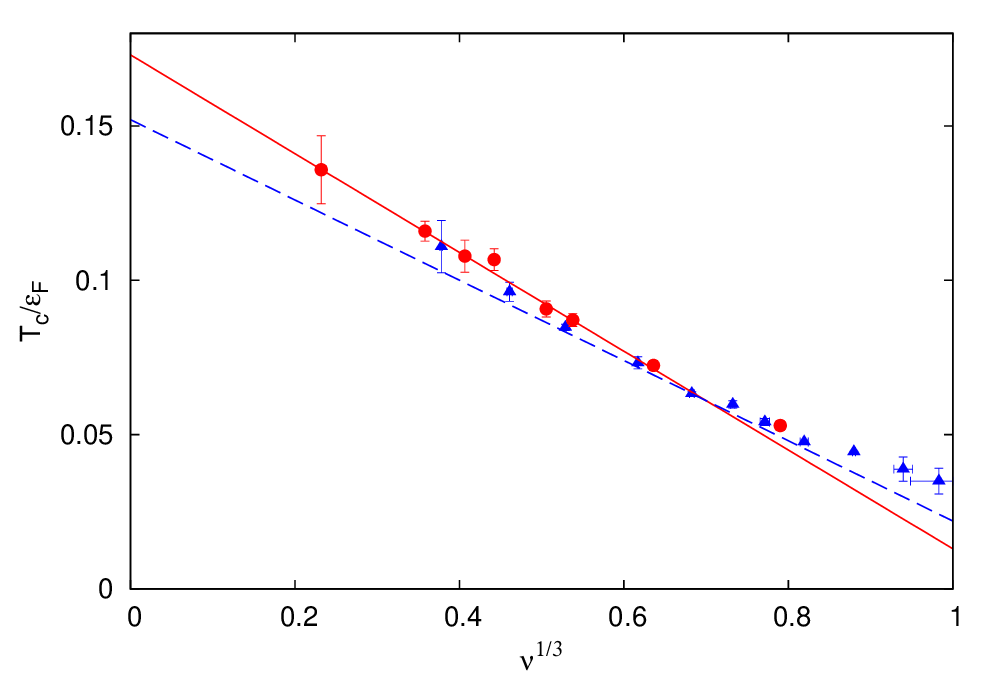

Linear continuum extrapolation of data for the critical temperature of the unitary Fermi gas. Red circles and red solid line are from [Phys. Rev. A 82, 053621 (2010)](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.82.053621) and the blue triangles and dashed blue line are from [New J. Phys. 8 153 (2006)](http://iopscience.iop.org/article/10.1088/1367-2630/8/8/153/meta)

### 2.3.3 Statistical description of data

Descriptive statistics (model-independent) => characterize a data set in general terms: 

- mean,
- variance,
- correlation between data sets, etc.

$N$ data points: $x_1,\ldots,x_N$ 

=> *sample* of data; contains random noise (for now assume uncorrelated data points)

Underlying distribution $P(x)$ *which we don't know*!

Properties of the exact distribution:

- Normalization

  $$\int_{-\infty}^\infty P(x) \, d x = 1$$
  
- Moments:

  $$\langle x^n\rangle=\int_{-\infty}^\infty x^nP(x) \, d x$$
  
- From the moments get:

  $$
  \begin{align}
  \mu &\equiv \langle x \rangle \\
  \sigma^2 &\equiv \langle \, \left(x - \langle x\rangle\right)^2 \,
  \rangle = \langle x^2 \rangle - \langle x \rangle^2\, .
  \end{align}
  $$
  
  => mean and variance (which is the "standard deviation" squared)

We want to estimate the mean of the *exact distribution* from our *sampled data* and quantify our *uncertainty* of this estimate

- Sample mean

  $$\overline{x}=\frac{1}{N}\sum_{i=1}^Nx_i$$

     - estimates the value around which central clustering occurs
     - not always the best estimator => median

- Sample variance ("width" or "variability" around central value)

  $$
  s^2 =  {1 \over N-1} \sum_{i=1}^N \left( x_i -\overline{x}\right)^2 \, .
  $$

- Thought experiment:

   - suppose we could repeat the set of $N$ measurements many many times
   - each time we get a value of the sample average $\overline{x}$. 
   - construct a distribution, $\widetilde{P}(\overline{x})$ from these
   - enough repetitions => effectively averaging over the exact distribution

   $$
   \langle \overline{x} \rangle = {1 \over N} \sum_{i=1}^N \langle x_i \rangle =
   \langle x \rangle  \equiv \mu \, ,
   $$

   $$
   \boxed{ \mbox{the best estimate of } \mu \mbox{ is }\overline{x},}
   $$

   An estimate like this, which gives the exact result if averaged over many repetitions of the experiment, is said to be **unbiased**.

   - Uncertainty, or "error bar" on our estimate $\overline{x}$ for the exact average $\mu$:

     $$
     \sigma_{\overline{x}}^2 \equiv \langle \overline{x}^2 \rangle- \langle \overline{x} \rangle^2 = {\sigma^2 \over N}\, ,
     $$

     The problem is that we don't know $\sigma^2$... but we do know $s^2$ !

     averaging $s^2$ over many repetitions of $N$ data points gives $\sigma^2$ => unbiased estimate

   - Standard error of the mean: 

    $$
    \mbox{the best estimate of } \sigma_{\overline{x}}^2 \mbox{ is }{s^2  \over N}
    $$

Altogether:

$$
\mu = \overline{x}\; \pm \; \sigma_{\overline{x}} \, ,
$$

where

$$
\sigma_{\overline{x}} = \left[
{1 \over N(N-1)} \, \sum_{i=1}^N (x_i -  \overline{x})^2 \right]^{1/2} \, .
$$

the error bar in the mean goes down like $1/\sqrt{N}$ for large $N$.